# Determine if a better in-flight entertainment experience leads to higher customer satisfaction using logistic regression

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [4]:
airline_csat = pd.read_csv("..\airline_satisfaction.csv", index_col=0)

In [6]:
airline_csat.head

<bound method NDFrame.head of         Gender      Customer Type  Age   Type of Travel     Class  \
id                                                                  
70172     Male     Loyal Customer   13  Personal Travel  Eco Plus   
5047      Male  disloyal Customer   25  Business travel  Business   
110028  Female     Loyal Customer   26  Business travel  Business   
24026   Female     Loyal Customer   25  Business travel  Business   
119299    Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
78463     Male  disloyal Customer   34  Business travel  Business   
71167     Male     Loyal Customer   23  Business travel  Business   
37675   Female     Loyal Customer   17  Personal Travel       Eco   
90086     Male     Loyal Customer   14  Business travel  Business   
34799   Female     Loyal Customer   42  Personal Travel       Eco   

        Flight Distance  Inflight wifi service  \
id                    

In [7]:
airline_csat.shape

(129880, 23)

In [8]:
airline_csat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 70172 to 34799
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1

In [9]:
airline_csat.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [10]:
airline_csat_subset = airline_csat.dropna(axis=0).reset_index()

In [12]:
airline_csat_subset.head

<bound method NDFrame.head of             id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
129482   78463    Male  disloyal Customer   34  Business travel  Business   
129483   71167    Male     Loyal Customer   23  Business travel  Business   
129484   37675  Female     Loyal Customer   17  Personal Travel       Eco   
129485   90086    Male     Loyal Customer   14  Business travel  Business   
129486   34799  Female     Loyal Customer   42  Personal Travel       Eco   

        Flight Distance  Inflight wifi servic

In [13]:
airline_csat_subset.shape

(129487, 24)

In [14]:
airline_csat_subset['Inflight entertainment'] = airline_csat_subset['Inflight entertainment'].astype(float)

In [17]:
airline_csat_subset.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment               float64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [18]:
airline_csat_subset['satisfaction'].value_counts(normalize=True)*100

neutral or dissatisfied    56.550078
satisfied                  43.449922
Name: satisfaction, dtype: float64

In [19]:
airline_csat_subset['satisfaction encoded'] = OneHotEncoder(drop='first').fit_transform(airline_csat_subset[['satisfaction']]).toarray()

In [20]:
airline_csat_subset.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction encoded
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1.0


In [21]:
X = airline_csat_subset[['Inflight entertainment']]
y = airline_csat_subset['satisfaction encoded']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
clf = LogisticRegression().fit(X_train, y_train)

In [24]:
clf.coef_

array([[0.70019739]])

In [25]:
clf.intercept_

array([-2.6838766])

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction encoded'>

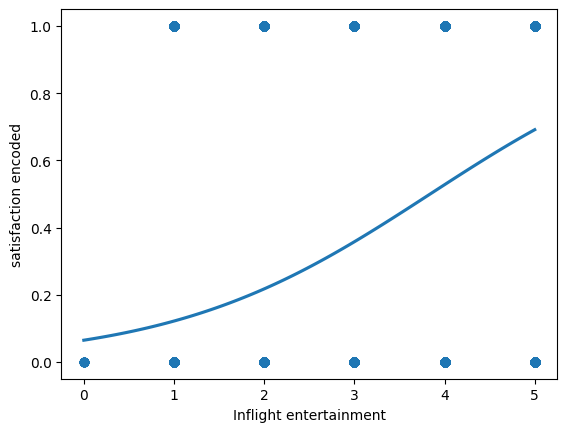

In [26]:
sns.regplot(x='Inflight entertainment', y='satisfaction encoded', data=airline_csat_subset, logistic=True, ci=None)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
y_pred

array([1., 0., 1., ..., 0., 1., 0.])

In [29]:
clf.predict_proba(X_test)

array([[0.47080501, 0.52919499],
       [0.6418228 , 0.3581772 ],
       [0.3063774 , 0.6936226 ],
       ...,
       [0.6418228 , 0.3581772 ],
       [0.47080501, 0.52919499],
       [0.6418228 , 0.3581772 ]])

In [30]:
metrics.accuracy_score(y_test, y_pred)

0.6983293433212346

In [31]:
metrics.precision_score(y_test, y_pred)

0.6245420350740072

In [32]:
metrics.recall_score(y_test, y_pred)

0.760197407539541

In [33]:
metrics.f1_score(y_test, y_pred)

0.6857250127383411

In [34]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

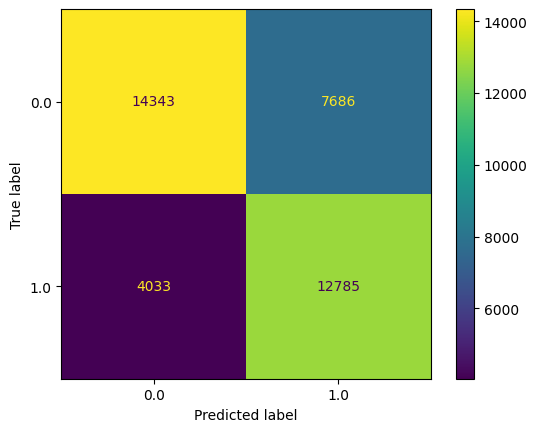

In [35]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = clf.classes_)
disp.plot()